In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#location of the Deepsense6G dataset we wish to process
scenario_folder = "/data/DeepSense6G/stationary_scenarios/scenario31"

#location that we wish to save the dataset to
dataset_folder = "/data/DeepSense6G/stationary_scenarios/scenario31/generated_dataset"
sample_idx = 1

Fetch scenario CSV and load Dataframe

In [9]:
try:
    csv_file = [f for f in os.listdir(scenario_folder) if f.endswith('csv')][0]
    csv_path = os.path.join(scenario_folder, csv_file)
except:
    raise Exception(f'No csv file inside {scenario_folder}.')

dataframe = pd.read_csv(csv_path)
print(f'Columns: {dataframe.columns.values}')
print(f'Number of Rows: {dataframe.shape[0]}')

Columns: ['index' 'unit1_rgb' 'unit1_pwr_60ghz' 'unit1_lidar' 'unit1_radar'
 'unit1_loc' 'unit2_loc' 'unit1_beam' 'unit1_max_pwr' 'time_stamp'
 'seq_index' 'unit2_spd_over_grnd_kmph' 'unit2_num_sats' 'unit2_altitude'
 'unit2_geo_sep' 'unit2_mode_fix_type' 'unit2_pdop' 'unit2_hdop'
 'unit2_vdop' 'unit2_interpolated_position']
Number of Rows: 7012


Camera Data

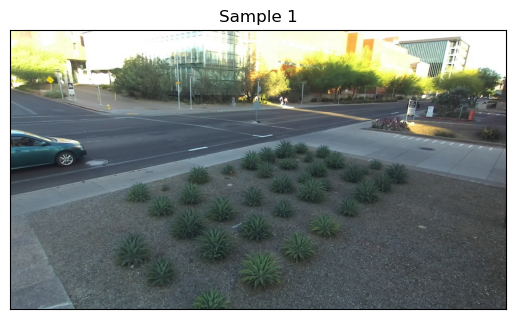

In [10]:
img_rel_paths = dataframe['unit1_rgb'].values

#create the figure
fig,ax = plt.subplots()

#get path to image
img_abs_path = os.path.join(scenario_folder, img_rel_paths[sample_idx])

#plot the rgb camera image
img = plt.imread(img_abs_path)
ax.imshow(img)
ax.set_title(f'Sample {sample_idx}')
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

Radar Data

max range: 115.96663586224109m


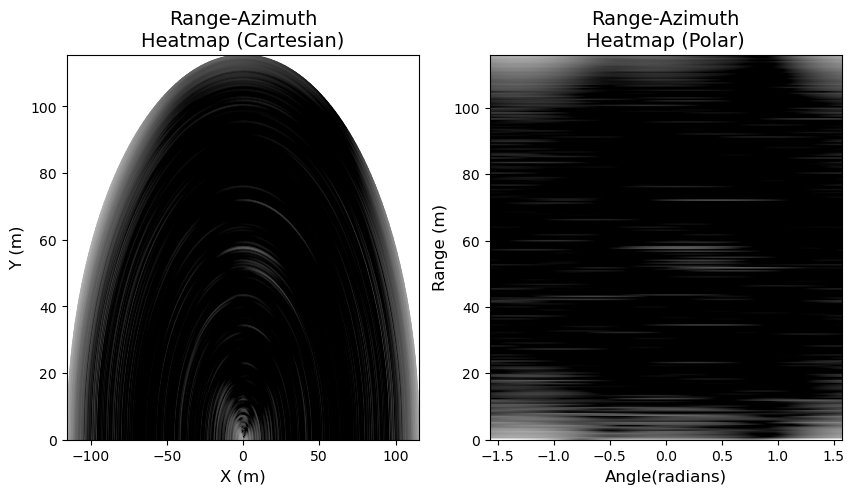

In [11]:
from Radar_Data_Processor import RadarDataProcessor

#initialize the radar
#initialize a raw data processor
radar_data_processor = RadarDataProcessor()
radar_data_processor.configure(
    scenario_data_path=scenario_folder,
    radar_rel_paths=dataframe["unit1_radar"].values,
    save_file_folder= os.path.join(dataset_folder,"radar/"),
    save_file_name="radar_frame",
    max_range_bin=256,
    num_chirps_to_save=3,
    num_angle_bins=256,
    power_range_dB=[-40,-10],
    chirps_per_frame= 250,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 256,
    adc_sample_rate_Hz = 6200e3,
    chirp_slope_MHz_us= 8.014,
    start_freq_Hz=77e9,
    idle_time_us = 2,
    ramp_end_time_us = 47.5
)

radar_data_processor.plot_range_azimuth_response(sample_idx)


In [12]:
import warnings
warnings.filterwarnings('ignore')
#save the generated responses to a file
radar_data_processor.generate_and_save_all_grids()

100%|██████████| 7012/7012 [00:34<00:00, 203.74it/s]


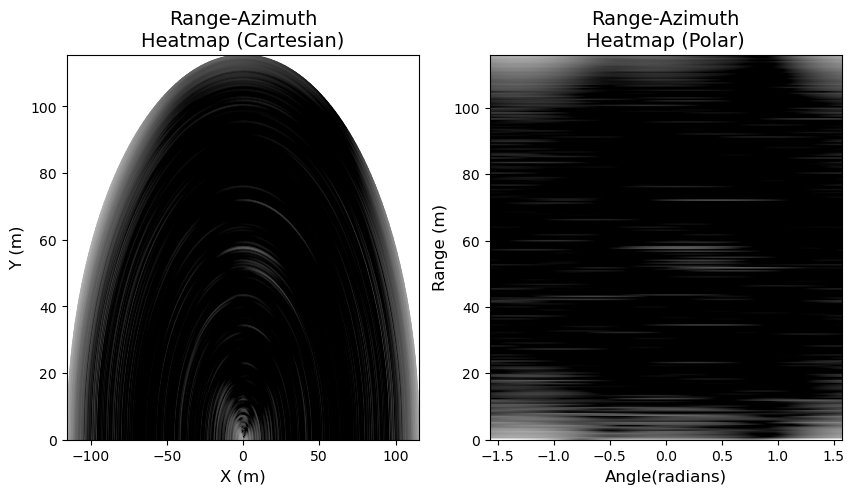

In [13]:
#plot a response from a previously saved file
radar_data_processor.plot_from_saved_range_azimuth_response(sample_idx)

Lidar Data

plot the filtered lidar point cloud in cartesian coordinates

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


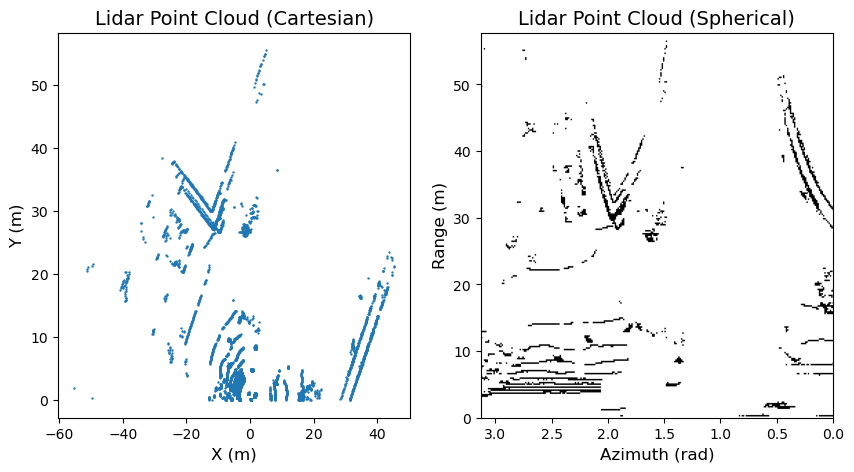

In [14]:
#custom point cloud importation
from Lidar_Data_Processor import LidarDataProcessor

lidar_data_processor = LidarDataProcessor()
lidar_data_processor.configure(
    scenario_data_path=scenario_folder,
    relative_paths=dataframe['unit1_lidar'].values,
    save_file_folder= os.path.join(dataset_folder,"lidar/"),
    save_file_name="lidar_frame",
    max_range_m=57.98,
    num_range_bins=256,
    angle_range_rad=[0,np.pi],
    num_angle_bins=256
)

lidar_data_processor.plot_pointcloud(sample_idx)

In [15]:
#process and save all of the lidar data
lidar_data_processor.generate_and_save_all_grids()

100%|██████████| 7012/7012 [01:04<00:00, 108.29it/s]


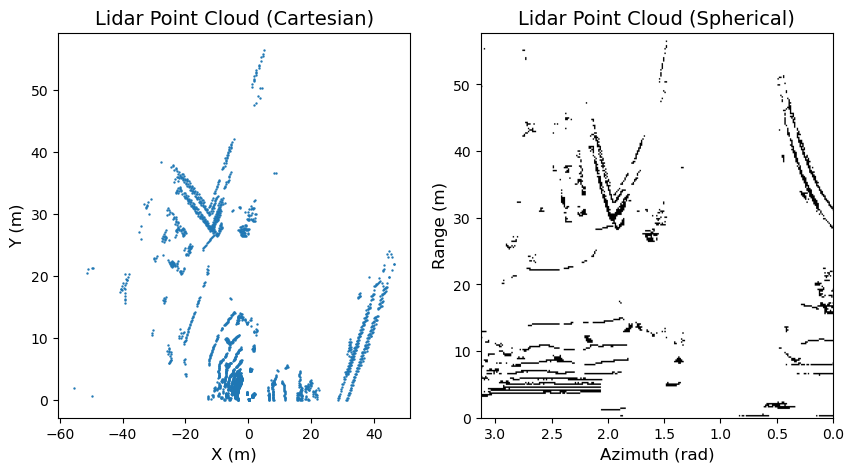

In [16]:
#load the grid from the file and diplay it
lidar_data_processor.plot_from_saved_grid(sample_idx)

lidar_data = lidar_data_processor.load_grid_from_file(sample_idx)